<p style="text-align:center">
    <a href="https://www.ict.mahidol.ac.th/en/" target="_blank">
    <img src="https://www3.ict.mahidol.ac.th/ICTSurveysV2/Content/image/MUICT2.png" width="400" alt="Faculty of ICT">
    </a>
</p>

# Lab05: Data Analysis

This lab assignment will provide hands-on practice in data cleaning and preparation using the World Happiness Report dataset. You will learn to identify and handle incorrect data types, manage missing values, and format data for effective analysis. Furthermore, this lab also addresses data transformation and statistical analysis. You will learn how to scale numerical features, bin continuous variables, encode categorical variables, and perform basic statistical analysis.


__Intructions:__
1. Append your ID at the end of this jupyter file name. For example, ```ITCS227_Lab05_Assignment_6788123.ipynb```
2. Complete each task in the lab.
3. Once finished, raise your hand to call a TA.
4. The TA will check your work and give you an appropriate score.
5. Submit the source code to MyCourse as record-keeping.

## Task 01: Data Cleaning and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset: Modified World Happiness Report 2015
try:
    df = pd.read_csv('files/world_happiness_report_2015_modified.csv')
except FileNotFoundError:
    print("world-happiness-report.csv not found locally.")

### Initial Data Inspection
1. Display the first 5 rows of the DataFrame using `head()`.
2. Display the last 5 rows of the DataFrame using `tail()`.
3. Use `info()` to get information about the data types and missing values.
4. Use `describe()` to get descriptive statistics for numerical columns.
5. Print the name of the columns

In [3]:
# Your code here
print("Head:----------------------------")
print(df.head())
print("Tail:----------------------------")
print(df.tail())
print("info:----------------------------")
print(df.info())
print("describe:----------------------------")
print(df.describe())
print("column:----------------------------")
print(df.columns)


Head:----------------------------
       Country          Region Happiness Rank  Happiness Score Standard Error  \
0  Switzerland  Western Europe              1            7.587        0.03411   
1      Iceland  Western Europe              2            7.561        0.04884   
2      Denmark  Western Europe              3            7.527        0.03328   
3       Norway  Western Europe        No Data            7.522         0.0388   
4       Canada   North America              5            7.427        No Data   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corrupt

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())
print("\nColumns:")
print(df.columns)
```
</details>

### Dealing with Incorrect Data Types
1. Check the data types of all columns using `dtypes`.

In [4]:
print(df.dtypes)

Country                           object
Region                            object
Happiness Rank                    object
Happiness Score                  float64
Standard Error                    object
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("\nData types before conversion:")
print(df.dtypes)
```
</details>

2. The 'Happiness Rank' column should be numeric. Convert it to integer type. Handle potential errors using `errors='coerce'`.

In [5]:
# Your code here
df['Happiness Rank'] = pd.to_numeric(df['Happiness Rank'],errors='coerce')
print(df['Happiness Rank'])

0        1.0
1        2.0
2        3.0
3        NaN
4        5.0
       ...  
153      NaN
154    155.0
155    156.0
156    157.0
157    158.0
Name: Happiness Rank, Length: 158, dtype: float64


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
df['Happiness Rank'] = pd.to_numeric(df['Happiness Rank'], errors='coerce')
```
</details>

3. The 'Standard Error' column should be numeric. Convert it to numeric type. Handle potential errors using `errors='coerce'`.

In [6]:
# Your code here
df['Standard Error'] = pd.to_numeric(df['Standard Error'],errors='coerce')
print(df['Standard Error'])

0      0.03411
1      0.04884
2      0.03328
3      0.03880
4          NaN
        ...   
153    0.03464
154    0.03656
155        NaN
156    0.08658
157    0.06727
Name: Standard Error, Length: 158, dtype: float64


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
df['Standard Error'] = pd.to_numeric(df['Standard Error'], errors='coerce')
```
</details>

In [7]:
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
Country                           object
Region                            object
Happiness Rank                   float64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


### Handling Missing Values
1. Check the number of missing values in each column using `isnull().sum()`.

In [8]:
# Your code here
df.isnull().sum()

Country                           0
Region                            0
Happiness Rank                   18
Happiness Score                   0
Standard Error                   20
Economy (GDP per Capita)          1
Family                            4
Health (Life Expectancy)          5
Freedom                           4
Trust (Government Corruption)     3
Generosity                        7
Dystopia Residual                 3
dtype: int64

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("\nMissing values:")
print(df.isnull().sum())
```
</details>

2. Calculate the percentage of missing values in each column.

In [9]:
# Your code here
df.isnull().mean() * 100

Country                           0.000000
Region                            0.000000
Happiness Rank                   11.392405
Happiness Score                   0.000000
Standard Error                   12.658228
Economy (GDP per Capita)          0.632911
Family                            2.531646
Health (Life Expectancy)          3.164557
Freedom                           2.531646
Trust (Government Corruption)     1.898734
Generosity                        4.430380
Dystopia Residual                 1.898734
dtype: float64

3. Visualize missing data using a heatmap from Seaborn.

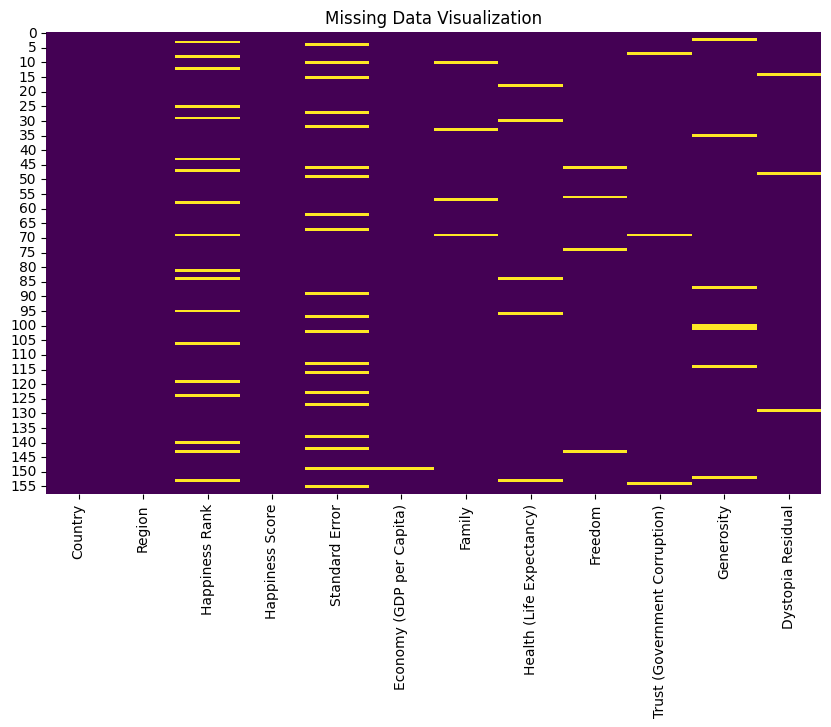

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()
```
</details>

4. Decide on a suitable strategy to handle missing values in each column. Implement your chosen strategy. You can use any of the following methods:
    *   Deletion (`dropna()`)
    *   Mean/median/mode imputation (`fillna()`)
    *   Forward/backward fill (`ffill()`, `bfill()`)
    *   (Optional) KNN Imputation

In [11]:
df['Happiness Rank'].fillna(df['Happiness Rank'].mean(), inplace=True)
df['Standard Error'].fillna(df['Standard Error'].mean(), inplace=True)
cols_to_impute = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
for col in cols_to_impute:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\gifly\AppData\Local\Temp\ipykernel_22184\2995131325.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Happiness Rank'].fillna(df['Happiness Rank'].mean(), inplace=True)
C:\Users\gifly\AppData\Local\Temp\ipykernel_22184\2995131325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
#Note: Your imputation methods can differ from this hint. 

# Impute missing values in 'Happiness Rank' using the median
df['Happiness Rank'].fillna(df['Happiness Rank'].median(), inplace=True)

# Impute missing values in 'Standard Error' using the mean
df['Standard Error'].fillna(df['Standard Error'].mean(), inplace=True)

# Impute missing values in other numerical columns using the median
cols_to_impute = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
for col in cols_to_impute:
    df[col].fillna(df[col].median(), inplace=True)
```
</details>

In [12]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                3
dtype: int64


### Data Formatting
1. Rename columns for better readability (e.g., replace spaces with underscores).

In [13]:
# Your code here
df.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita', 'Health (Life Expectancy)': 'Health_Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government_Corruption'}, inplace=True)
df


,Country,Region,Happiness_Rank,Happiness Score,Standard Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1.000000,7.587,0.034110,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2.000000,7.561,0.048840,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3.000000,7.527,0.033280,1.32548,1.36058,0.87464,0.64938,0.48357,0.21747,2.49204
3,Norway,Western Europe,80.021429,7.522,0.038800,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5.000000,7.427,0.047899,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,80.021429,3.465,0.034640,0.22208,0.77370,0.69702,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155.000000,3.340,0.036560,0.28665,0.35386,0.31910,0.48450,0.10713,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156.000000,3.006,0.047899,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157.000000,2.905,0.086580,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
#Note: The renamed column names can differ from this hint.
df.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita', 'Health (Life Expectancy)': 'Health_Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government_Corruption'}, inplace=True)
```
</details>

2. Display the cleaned and formatted DataFrame using `head()`.

In [14]:
# Your code here
df.head()

,Country,Region,Happiness_Rank,Happiness Score,Standard Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1.000000,7.587,0.034110,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2.000000,7.561,0.048840,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3.000000,7.527,0.033280,1.32548,1.36058,0.87464,0.64938,0.48357,0.21747,2.49204
3,Norway,Western Europe,80.021429,7.522,0.038800,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5.000000,7.427,0.047899,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("\nFirst 5 rows of the processed DataFrame:")
print(df.head())
```
</details>

In [15]:
# Show the data types after all the changes
print("\nData types after all changes:")
print(df.dtypes)


Data types after all changes:
Country                         object
Region                          object
Happiness_Rank                 float64
Happiness Score                float64
Standard Error                 float64
Economy_GDP_per_Capita         float64
Family                         float64
Health_Life_Expectancy         float64
Freedom                        float64
Trust_Government_Corruption    float64
Generosity                     float64
Dystopia Residual              float64
dtype: object


## Task 02: Data Transformation and Statistical Analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from scipy import stats

In [17]:
# Load the original World Happiness Report dataset (2015)
try:
    df = pd.read_csv('files/world_happiness_report_2015.csv')
except FileNotFoundError:
    print("world-happiness-report.csv not found locally.")

In [18]:
# Basic Data Cleaning
df.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita', 'Health (Life Expectancy)': 'Health_Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government_Corruption'}, inplace=True)
numerical_cols = ['Happiness_Rank', 'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Standard Error']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
df['Region'] = pd.Categorical(df['Region'])

C:\Users\gifly\AppData\Local\Temp\ipykernel_22184\4103897390.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\gifly\AppData\Local\Temp\ipykernel_22184\4103897390.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### Value Normalization/Scaling
1. Select the numerical columns (excluding 'Happiness Score' as it's our target).

In [19]:
# Your code here
numerical_cols_for_scaling = numerical_cols.copy()
numerical_cols_for_scaling.remove('Happiness_Rank')

df_numerical = df[numerical_cols_for_scaling].copy()
df_numerical

,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Standard Error
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0.03411
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0.04884
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0.03328
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0.03880
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0.03553
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.03464
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,0.03656
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.05015
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,0.08658


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
numerical_cols_for_scaling = numerical_cols.copy()
numerical_cols_for_scaling.remove('Happiness_Rank')

df_numerical = df[numerical_cols_for_scaling].copy()
```
</details>

2. Apply Min-Max scaling to the numerical columns and store the result in a new DataFrame `df_minmax`.

In [20]:
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)
print(df_minmax)

     Economy_GDP_per_Capita    Family  Health_Life_Expectancy   Freedom  \
0                  0.826132  0.962403                0.918244  0.993789   
1                  0.770412  1.000000                0.924496  0.938841   
2                  0.784113  0.970297                0.853099  0.969615   
3                  0.863099  0.949167                0.863409  1.000000   
4                  0.784592  0.943219                0.883326  0.945112   
..                      ...       ...                     ...       ...   
153                0.131376  0.551764                0.418083  0.883953   
154                0.169573  0.252355                0.311241  0.723426   
155                0.392329  0.338668                0.704150  0.234184   
156                0.009051  0.296578                0.218444  0.176937   
157                0.123449  0.099805                0.277425  0.544294   

     Trust_Government_Corruption  Generosity  Standard Error  
0                       0.760595    

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)
```
</details>

3. Apply Standardization (Z-score normalization) to the numerical columns and store the result in `df_standard`.

In [21]:
# Your code here
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)
print(df_standard)

     Economy_GDP_per_Capita    Family  Health_Life_Expectancy   Freedom  \
0                  1.369621  1.320281                1.263408  1.577438   
1                  1.135226  1.514458                1.289434  1.332456   
2                  1.192861  1.361054                0.992229  1.469659   
3                  1.525130  1.251922                1.035145  1.605131   
4                  1.194876  1.221204                1.118054  1.360416   
..                      ...       ...                     ...       ...   
153               -1.552987 -0.800520               -0.818610  1.087740   
154               -1.392303 -2.346860               -1.263362  0.372033   
155               -0.455245 -1.901086                0.372199 -1.809238   
156               -2.067566 -2.118467               -1.649648 -2.064472   
157               -1.586334 -3.134725               -1.404129 -0.426621   

     Trust_Government_Corruption  Generosity  Standard Error  
0                       2.309652    

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)
```
</details>

4. Apply Robust Scaling to the numerical columns and store the result in `df_robust`.

In [22]:
# Your code here
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns, index=df_numerical.index)
```
</details>

5. Compare the distributions of a chosen column (e.g., 'Economy_GDP_per_Capita') before and after each scaling method using histograms or KDE plots.

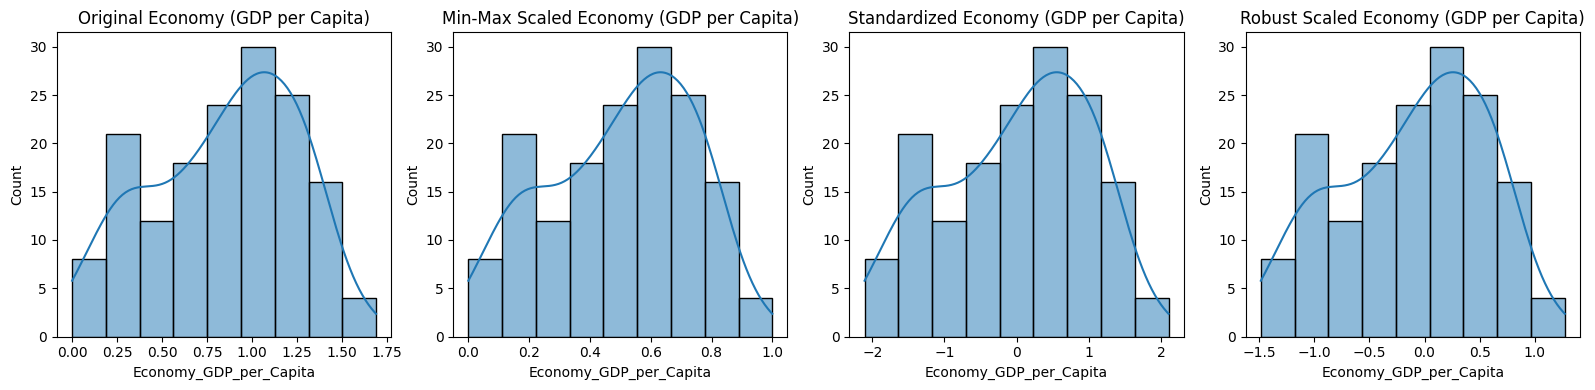

In [23]:
# Your code here
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(df_numerical['Economy_GDP_per_Capita'], ax=axes[0], kde=True)
axes[0].set_title('Original Economy (GDP per Capita)')

sns.histplot(df_minmax['Economy_GDP_per_Capita'], ax=axes[1], kde=True)
axes[1].set_title('Min-Max Scaled Economy (GDP per Capita)')

sns.histplot(df_standard['Economy_GDP_per_Capita'], ax=axes[2], kde=True)
axes[2].set_title('Standardized Economy (GDP per Capita)')

sns.histplot(df_robust['Economy_GDP_per_Capita'], ax=axes[3], kde=True)
axes[3].set_title('Robust Scaled Economy (GDP per Capita)')

plt.tight_layout()
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(df_numerical['Economy_GDP_per_Capita'], ax=axes[0], kde=True)
axes[0].set_title('Original Economy (GDP per Capita)')

sns.histplot(df_minmax['Economy_GDP_per_Capita'], ax=axes[1], kde=True)
axes[1].set_title('Min-Max Scaled Economy (GDP per Capita)')

sns.histplot(df_standard['Economy_GDP_per_Capita'], ax=axes[2], kde=True)
axes[2].set_title('Standardized Economy (GDP per Capita)')

sns.histplot(df_robust['Economy_GDP_per_Capita'], ax=axes[3], kde=True)
axes[3].set_title('Robust Scaled Economy (GDP per Capita)')

plt.tight_layout()
plt.show()
```
</details>

6. (Open-ended) Discuss when each scaling method is most appropriate.

### Binning (Discretization)
1. Bin 'Economy_GDP_per_Capita' into 5 equal-width bins and store the result in a new column 'GDP_Binned_EqualWidth'.

In [24]:
# Your code here
df['GDP_Binned_EqualWidth'] = pd.cut(df['Economy_GDP_per_Capita'], bins=5, labels=False, include_lowest=True)

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
df['GDP_Binned_EqualWidth'] = pd.cut(df['Economy_GDP_per_Capita'], bins=5, labels=False, include_lowest=True)
```
</details>

2. Bin 'Economy_GDP_per_Capita' into quartiles (4 equal-frequency bins) and store the result in 'GDP_Binned_Quantiles'.

In [25]:
# Your code here
df['GDP_Binned_Quantiles'] = pd.qcut(df['Economy_GDP_per_Capita'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
df['GDP_Binned_Quantiles'] = pd.qcut(df['Economy_GDP_per_Capita'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
```
</details>

3. Compare the distributions of the original and binned data using histograms.

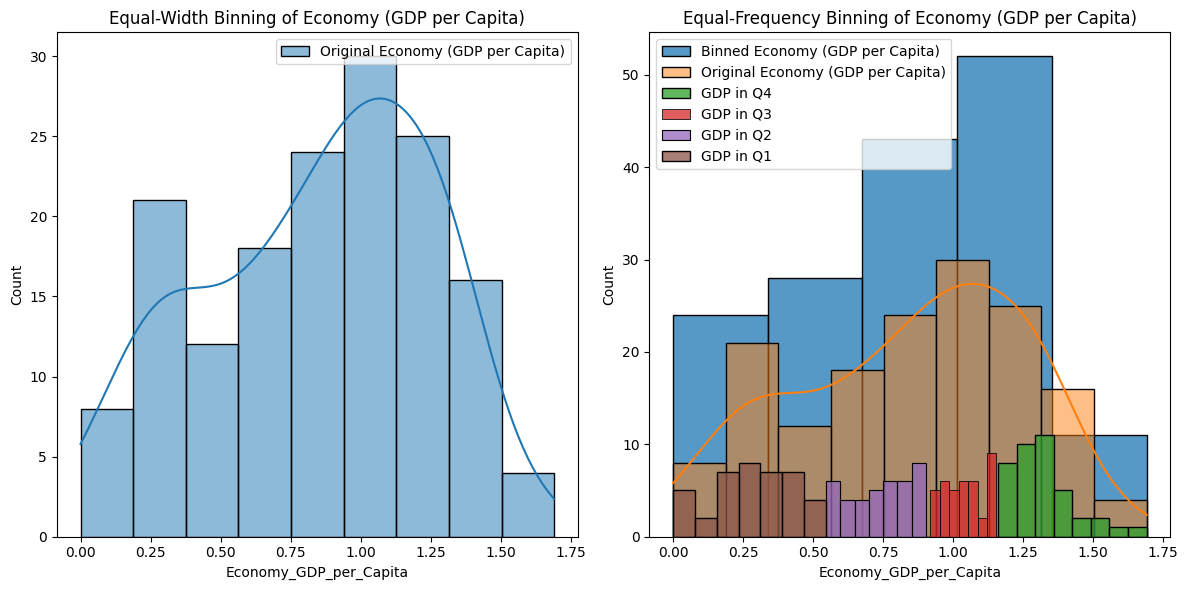

In [26]:
# Your code here
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Economy_GDP_per_Capita'], ax=axes[0], kde=True, label='Original Economy (GDP per Capita)')
sns.histplot(df['Economy_GDP_per_Capita'], bins=5, label='Binned Economy (GDP per Capita)')
axes[0].set_title('Equal-Width Binning of Economy (GDP per Capita)')
axes[0].legend()

sns.histplot(df['Economy_GDP_per_Capita'], ax=axes[1], kde=True, label='Original Economy (GDP per Capita)')
for i in df['GDP_Binned_Quantiles'].unique():
    sns.histplot(df[df['GDP_Binned_Quantiles'] == i]['Economy_GDP_per_Capita'], label=f'GDP in {i}', ax=axes[1])
axes[1].set_title('Equal-Frequency Binning of Economy (GDP per Capita)')
axes[1].legend()

plt.tight_layout()
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Economy_GDP_per_Capita'], ax=axes[0], kde=True, label='Original Economy (GDP per Capita)')
sns.histplot(df['Economy_GDP_per_Capita'], bins=5, label='Binned Economy (GDP per Capita)')
axes[0].set_title('Equal-Width Binning of Economy (GDP per Capita)')
axes[0].legend()

sns.histplot(df['Economy_GDP_per_Capita'], ax=axes[1], kde=True, label='Original Economy (GDP per Capita)')
for i in df['GDP_Binned_Quantiles'].unique():
    sns.histplot(df[df['GDP_Binned_Quantiles'] == i]['Economy_GDP_per_Capita'], label=f'GDP in {i}', ax=axes[1])
axes[1].set_title('Equal-Frequency Binning of Economy (GDP per Capita)')
axes[1].legend()

plt.tight_layout()
plt.show()
```
</details>

4. (Open-ended) Discuss the advantages and disadvantages of each binning method in this context.

### Dealing with Categorical Variables (Tasks)
1. One-hot encode the 'Region' column using both `pd.get_dummies()` and `OneHotEncoder`.

In [27]:
# Your code here
df_encoded_get_dummies = pd.get_dummies(df, columns=['Region'], prefix='Region')

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[['Region']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Region']), index=df.index)
df_encoded_ohe = pd.concat([df.drop(['Region'], axis=1), encoded_df], axis=1)

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
df_encoded_get_dummies = pd.get_dummies(df, columns=['Region'], prefix='Region')

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[['Region']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Region']), index=df.index)
df_encoded_ohe = pd.concat([df.drop(['Region'], axis=1), encoded_df], axis=1)
```
</details>

2. Compare the output of both methods.

In [28]:
# Your code here
print("\nOne-hot encoding using get_dummies():")
print(df_encoded_get_dummies.head())
print("\nOne-hot encoding using OneHotEncoder:")
print(df_encoded_ohe.head())


One-hot encoding using get_dummies():
       Country  Happiness_Rank  Happiness Score  Standard Error  \
0  Switzerland               1            7.587         0.03411   
1      Iceland               2            7.561         0.04884   
2      Denmark               3            7.527         0.03328   
3       Norway               4            7.522         0.03880   
4       Canada               5            7.427         0.03553   

   Economy_GDP_per_Capita   Family  Health_Life_Expectancy  Freedom  \
0                 1.39651  1.34951                 0.94143  0.66557   
1                 1.30232  1.40223                 0.94784  0.62877   
2                 1.32548  1.36058                 0.87464  0.64938   
3                 1.45900  1.33095                 0.88521  0.66973   
4                 1.32629  1.32261                 0.90563  0.63297   

   Trust_Government_Corruption  Generosity  ...  \
0                      0.41978     0.29678  ...   
1                      0.1414

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("\nOne-hot encoding using get_dummies():")
print(df_encoded_get_dummies.head())
print("\nOne-hot encoding using OneHotEncoder:")
print(df_encoded_ohe.head())
```
</details>

### Statistical Analysis 
1. Calculate and print the descriptive statistics for all *numerical* columns in the DataFrame using the `describe()` method.

In [29]:
# Your code here
print(df.describe())

       Happiness_Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy_GDP_per_Capita      Family  Health_Life_Expectancy     Freedom  \
count              158.000000  158.000000              158.000000  158.000000   
mean                 0.846137    0.991046                0.630259    0.428615   
std                  0.403121    0.272369                0.247078    0.150693   
min                  0.000000    0.000000                0.000000    0.000000   
25%                  0.545808    0.856823                0.439185    0.3

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("\nDescriptive statistics for numerical columns:")
print(df.describe())
```
</details>

2. Calculate and print the mean, median, and standard deviation of 'Happiness Score'.

In [30]:
# Your code here
print("\nMean Happiness Score:", df['Happiness Score'].mean())
print("Median Happiness Score:", df['Happiness Score'].median())
print("Standard Deviation of Happiness Score:", df['Happiness Score'].std())


Mean Happiness Score: 5.375734177215189
Median Happiness Score: 5.2325
Standard Deviation of Happiness Score: 1.1450101349520665


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("\nMean Happiness Score:", df['Happiness Score'].mean())
print("Median Happiness Score:", df['Happiness Score'].median())
print("Standard Deviation of Happiness Score:", df['Happiness Score'].std())
```
</details>

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("\nPercentage of Missing Values per Column:")
print(df.isnull().sum() / len(df) * 100)
```
</details>

3. Calculate and print the 25th, 50th (median), and 75th percentiles (quantiles) of 'Economy_GDP_per_Capita'.

In [31]:
# Your code here
print("Economy_GDP_per_Capita at 25th, 50th and 75th percentiles:\n", df['Economy_GDP_per_Capita'].quantile([0.25, 0.5, 0.75]))

Economy_GDP_per_Capita at 25th, 50th and 75th percentiles:
 0.25    0.545808
0.50    0.910245
0.75    1.158448
Name: Economy_GDP_per_Capita, dtype: float64


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
print("Economy_GDP_per_Capita at 25th, 50th and 75th percentiles:\n", df['Economy_GDP_per_Capita'].quantile([0.25, 0.5, 0.75]))
```
</details>

4. Create a histogram of 'Happiness Score' using Seaborn. Add appropriate title and labels.

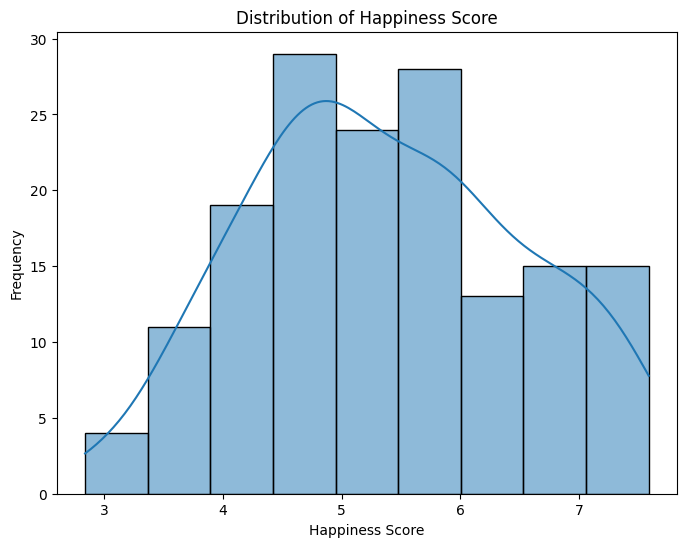

In [32]:
# Your code here
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()
```
</details>

5. Create box plots of 'Happiness Score' for each 'Region' using Seaborn. Add appropriate title and labels.

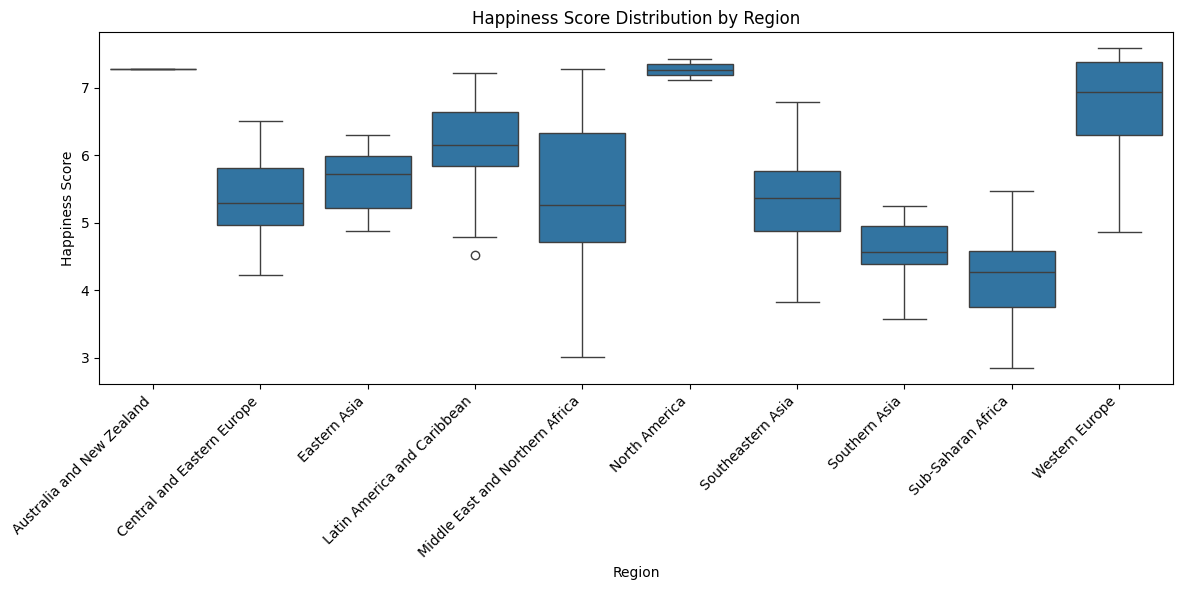

In [33]:
# Your code here
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness Score', data=df)
plt.title('Happiness Score Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness Score', data=df)
plt.title('Happiness Score Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
```
</details>

6. Create violin plots of 'Economy_GDP_per_Capita' for each 'Region' using Seaborn. Add appropriate title and labels and rotate x axis labels if needed.

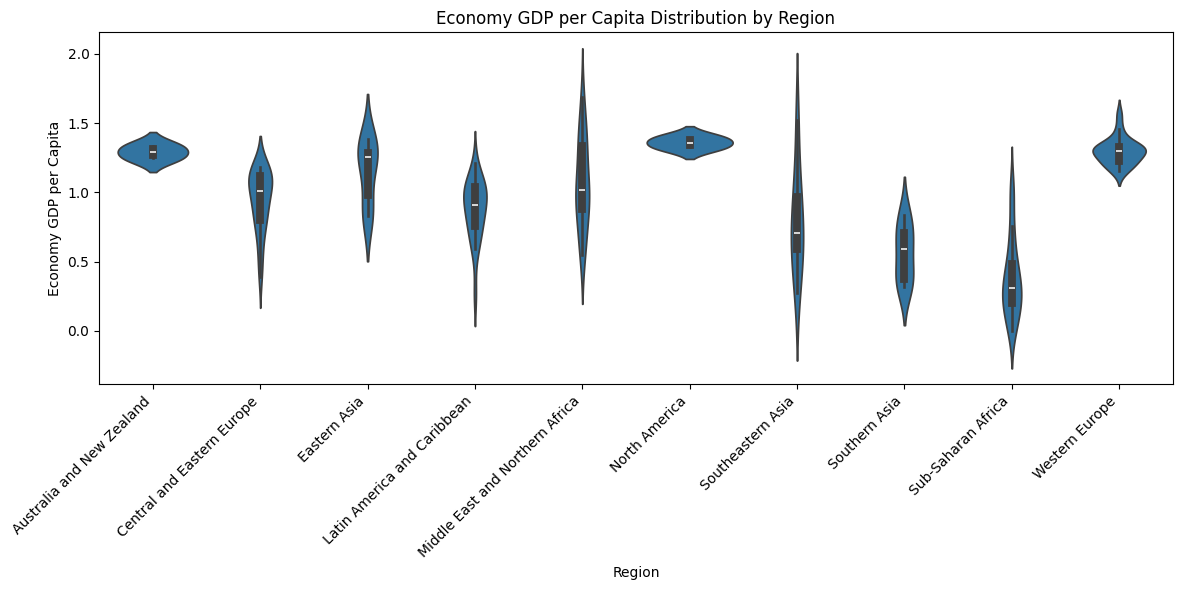

In [34]:
# Your code here
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Economy_GDP_per_Capita', data=df)
plt.title('Economy GDP per Capita Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Economy GDP per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='Economy_GDP_per_Capita', data=df)
plt.title('Economy GDP per Capita Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Economy GDP per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
```
</details>

7. Calculate the correlation matrix for all numerical columns.

In [35]:
# Your code here
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                             Happiness_Rank  Happiness Score  Standard Error  \
Happiness_Rank                     1.000000        -0.992105        0.158516   
Happiness Score                   -0.992105         1.000000       -0.177254   
Standard Error                     0.158516        -0.177254        1.000000   
Economy_GDP_per_Capita            -0.785267         0.780966       -0.217651   
Family                            -0.733644         0.740605       -0.120728   
Health_Life_Expectancy            -0.735613         0.724200       -0.310287   
Freedom                           -0.556886         0.568211       -0.129773   
Trust_Government_Corruption       -0.372315         0.395199       -0.178325   
Generosity                        -0.160142         0.180319       -0.088439   
Dystopia Residual                 -0.521999         0.530474        0.083981   
GDP_Binned_EqualWidth             -0.756682         0.751894       -0.181407   

                  

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)
```
</details>

8. Visualize the correlation matrix using a heatmap from Seaborn. Add annotations and use a suitable colormap.

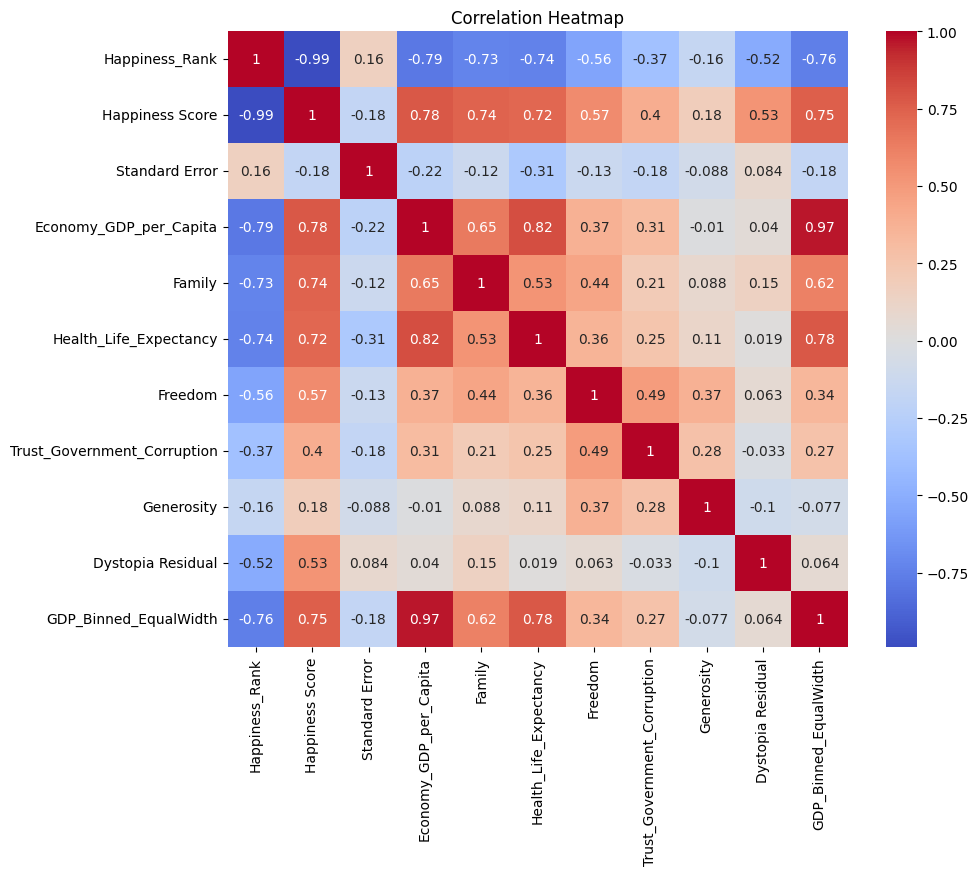

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
```
</details>

9. Perform a t-test to compare the mean 'Happiness Score' between two regions of your choice. State your null and alternative hypotheses. Interpret the results based on the p-value.

In [37]:
# Your code here
region1 = 'Western Europe'
region2 = 'North America'
happiness1 = df[df['Region'] == region1]['Happiness Score'].dropna()
happiness2 = df[df['Region'] == region2]['Happiness Score'].dropna()

if not happiness1.empty and not happiness2.empty:
    t_statistic, p_value = stats.ttest_ind(happiness1, happiness2, nan_policy='omit')

    print(f"\nT-test comparing mean Happiness Score in {region1} and {region2}:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    alpha = 0.05
    if p_value < alpha:
        print(f"There is a statistically significant difference in mean Happiness Score between {region1} and {region2}.")
    else:
        print(f"There is no statistically significant difference in mean Happiness Score between {region1} and {region2}.")
else:
    print("Not enough data for t-test for the selected regions")


T-test comparing mean Happiness Score in Western Europe and North America:
T-statistic: -0.9779525619333025
P-value: 0.3392302243783656
There is no statistically significant difference in mean Happiness Score between Western Europe and North America.


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```Python
# Note: Your selected regions may differ from the hint.
region1 = 'Western Europe'
region2 = 'North America'
happiness1 = df[df['Region'] == region1]['Happiness Score'].dropna()
happiness2 = df[df['Region'] == region2]['Happiness Score'].dropna()

if not happiness1.empty and not happiness2.empty:
    t_statistic, p_value = stats.ttest_ind(happiness1, happiness2, nan_policy='omit')

    print(f"\nT-test comparing mean Happiness Score in {region1} and {region2}:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)

    alpha = 0.05
    if p_value < alpha:
        print(f"There is a statistically significant difference in mean Happiness Score between {region1} and {region2}.")
    else:
        print(f"There is no statistically significant difference in mean Happiness Score between {region1} and {region2}.")
else:
    print("Not enough data for t-test for the selected regions")
```
</details>

<p style="text-align:center;">That's it! Congratulations! <br> 
    Now, call an LA to check your solution. Then, upload your code on MyCourses.</p>